In [1]:
import json
import os

In [2]:
!ls ../data

annotations  new_annotations  train2014  train_vizwiz


In [3]:
ABS_PATH = '../data/annotations'
name = [i for i in os.listdir(ABS_PATH) if 'vizwiz' in i and 'train' in i][0]

In [4]:
vizwiz_annot = json.load(open(os.path.join(ABS_PATH,name),'r'))

In [5]:
vizwiz_annot.keys()

dict_keys(['info', 'images', 'annotations'])

In [6]:
vizwiz_annot['images'][:5], vizwiz_annot['annotations'][:5]

([{'file_name': 'VizWiz_train_00000000.jpg',
   'vizwiz_url': 'https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00000000.jpg',
   'id': 0,
   'text_detected': True},
  {'file_name': 'VizWiz_train_00000001.jpg',
   'vizwiz_url': 'https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00000001.jpg',
   'id': 1,
   'text_detected': True},
  {'file_name': 'VizWiz_train_00000002.jpg',
   'vizwiz_url': 'https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00000002.jpg',
   'id': 2,
   'text_detected': True},
  {'file_name': 'VizWiz_train_00000003.jpg',
   'vizwiz_url': 'https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00000003.jpg',
   'id': 3,
   'text_detected': True},
  {'file_name': 'VizWiz_train_00000004.jpg',
   'vizwiz_url': 'https://ivc.ischool.utexas.edu/VizWiz_visualization_img/VizWiz_train_00000004.jpg',
   'id': 4,
   'text_detected': True}],
 [{'caption': 'ITS IS A BASIL LEAVES CONTAINER ITS CONTAINS THE NET W

In [7]:
[i for i in vizwiz_annot['annotations'] if i['is_rejected']==True]

[{'caption': 'Quality issues are too severe to recognize visual content.',
  'image_id': 0,
  'is_precanned': True,
  'is_rejected': True,
  'id': 2,
  'text_detected': True},
 {'caption': 'A wonderful view of the fog windows in the room is very thick',
  'image_id': 10,
  'is_precanned': False,
  'is_rejected': True,
  'id': 52,
  'text_detected': False},
 {'caption': 'imagine how you would describe this image on the phone to a friend.',
  'image_id': 11,
  'is_precanned': False,
  'is_rejected': True,
  'id': 55,
  'text_detected': True},
 {'caption': 'Quality issues are too severe to recognize visual content.',
  'image_id': 15,
  'is_precanned': True,
  'is_rejected': True,
  'id': 78,
  'text_detected': False},
 {'caption': 'Quality issues are too severe to recognize visual content.',
  'image_id': 18,
  'is_precanned': True,
  'is_rejected': True,
  'id': 93,
  'text_detected': True},
 {'caption': 'Beautiful view from behind the walls hidden under dark mist',
  'image_id': 28,
  

In [17]:
len(set([i['id'] for i in vizwiz_annot['images']]))

23431

In [22]:
from collections import Counter
counter = Counter([i['image_id'] for i in vizwiz_annot['annotations']])
set(counter.values())


{5}

In [10]:
def check_caption(x):
    words = ['boy', 'girl', 'guy', 'person', 'women', 'child', 'man', 'emotion', 'face', 'happy',
            'angry', 'sad', 'cross', 'disgust', 'surprised']
    x = x.replace('.','').replace(',','').split(' ')
    return set(x).intersection(words)
        

In [12]:
person_captions = [i for i in vizwiz_annot['annotations'] if check_caption(i['caption'])]

In [19]:
person_captions[0]

{'caption': 'A person uses a pair of brown hiking boots.',
 'image_id': 5,
 'is_precanned': False,
 'is_rejected': False,
 'id': 25,
 'text_detected': False}

In [14]:
len([i['id'] for i in person_captions]), len(set([i['id'] for i in person_captions]))

(5342, 5342)

In [22]:
images = dict([(i['id'], i['file_name']) for i in vizwiz_annot['images']])

In [33]:
people_annot = {}
for label_info in person_captions:
    id = label_info['image_id']
    filename = images[id]
    labels = people_annot.get(filename, [])
    labels.append(label_info['caption'])
    people_annot.update({filename:labels})

In [34]:
people_annot

{'VizWiz_train_00000005.jpg': ['A person uses a pair of brown hiking boots.'],
 'VizWiz_train_00000006.jpg': ['A person is holding a container of orange mouthwash.'],
 'VizWiz_train_00000009.jpg': ['A chrome shower drain with the shadow of the hands of the person taking the picture'],
 'VizWiz_train_00000010.jpg': ['A person is holding a white Samsung phone on a bed.',
  'A person holding a white cell phone in their hand.'],
 'VizWiz_train_00000011.jpg': ['A person holding a food can with the rear of the label facing forward.'],
 'VizWiz_train_00000013.jpg': ['A can of Dr pepper soda sits on a bed sheet that is covering a person'],
 'VizWiz_train_00000015.jpg': ['The white t-shirt is on the person and the floor is tiled and marbled like.'],
 'VizWiz_train_00000020.jpg': ['Most of grand theft auto vice, a video game, is shown with the cover of the video game showing a motorcycle in the upper right corner, and an African American man with a gun in the lower right corner, and a few cars o

## visualization of annotations

['A black iPhone with a clear case being held in the hand of a person.']


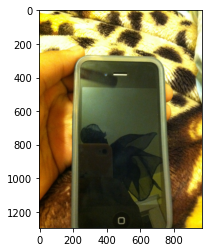

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
abs_path = '../data/train_vizwiz/'
idx = np.random.choice(range(len(people_annot)))
path, labels = list(people_annot.items())[idx]
image = np.array(PIL.Image.open(os.path.join(abs_path,path)))
plt.imshow(image);
print(labels)

## saving new annotations

In [52]:
import json
with open("../data/new_annotations/vizwiz_annotations.json", 'w') as f:
    json.dump(people_annot, f)